# Chapter 7.1 - Spatial Data Types

In Chapter 2, we learned about primitive and composite data types in Python. One of the comparisons we made to the "real world" was chess. Each chess piece has a set of rules that allow them to move in certain ways (with advantages and disadvantages). The pawn, for example, has a very limited set of moves, whereas the queen has almost all of the moves that other chess pieces have.

Spatial data types are similar. At the highest level, there are two major spatial data types:

1. [Raster Data](https://en.wikipedia.org/wiki/Raster_graphics) - Representations of spatial data using an n-dimensional array representing equally-spaced geographic/geometric regions (i.e., cells, grid cells, pixels, etc.). Typically used for continuous spatial data.

![raster_eg](https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Srtm_ramp2.world.21600x10800.jpg/2560px-Srtm_ramp2.world.21600x10800.jpg)

2. [Vector Data](https://en.wikipedia.org/wiki/Data_model_(GIS)#Vector_data_model) - Representations of spatial data using geometric / geographic coordinates (i.e., points, lines, polygons, etc.). Typically used to describe a specific geographic coordinate or set of coordinates.

![vector_eg](https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Simple_vector_map.svg/2560px-Simple_vector_map.svg.png)

In the Geosciences, these are examples of each data type:

Vector data:

1. [Hourly weather observation for DeKalb Airport](https://forecast.weather.gov/data/obhistory/KDKB.html) (point)
2. [Earthquake epicenter in California](https://earthquake.usgs.gov/earthquakes/eventpage/nc75293016/executive) (point)
3. [Analyzed frontal boundaries](https://www.wpc.ncep.noaa.gov/NationalForecastChart/staticmaps/noaad1.png) (line)
4. [San Andres Fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) (line)
5. [Kansas Tornado watch in April 2012](https://www.spc.noaa.gov/exper/archive/event.php?date=20120414) (polygon)
6. [Tectonic Plates](https://en.wikipedia.org/wiki/Plate_tectonics) (polygon)

Raster data:
1. [USA Precipitation Climatology](https://prism.oregonstate.edu/normals/)
2. [Earthquake Frequency Map](https://www.usgs.gov/media/images/frequency-damaging-earthquake-shaking-around-us)

In this chapter, we will discuss [geographic information systems (GIS)](https://en.wikipedia.org/wiki/Geographic_information_system) and their applications in the Geosciences. Applicable GIS processes can include simple mapping and cartography, vector transforms, and even complex raster analyses.

The following packages are required to run this notebook (you might have to restart your notebook):

In [1]:
!pip install shapely
!pip install geopandas
!pip install cartopy
!pip install xarray

### Vector Data in Geopandas

In Chapter 6, we learned about the Python package named ```pandas```. It was very useful for reading in and analyzing tabular data. ```geopandas``` can be understood as an extension of ```pandas```--namely, it allows geometric/geographic data to be attached to tabular data.

In the examples above (earthquake information, rainfall observations, etc.), three types of information are stored:

1. **Attributes** -- descriptive variables that can be used either in spatial or non-spatial analyses. Often these include date and time information, as well as variables for a particular problem. For example, precipitation totals can be added up to find a sum over a date period using non-spatial variables;
2. **Location** - variables that encode a geographic location. The most basic coordinate system used is latitude/longitude degrees, but some projected coordinate systems use meters or even feet.
3. **Metadata** - descriptions of the data that add more context. For example, the coordinate system, units, etc.

In ```geopandas``` the **attributes** of the event/observation are handled by the basic ```pandas``` methods, whereas the location and metadata information are handled by ```geopandas``` methods. As a result, you can transfer your pandas knowledge directly to geopandas.

In the example below, I use cartopy to quickly download a [shapefile](https://en.wikipedia.org/wiki/Shapefile) that describes the location and boundaries of countries using vector information.

```import cartopy.io.shapereader as shpreader``` imports the specific "shapefile reader" (shpreader) tool. This tool has a method called ```natural_earth``` that automatically downloads common shapefiles (like state, country, etc., boundaries).

What columns are **attribute** data and what columns are **location** data?

In [2]:
import geopandas as gpd
import cartopy.io.shapereader as shpreader

shpfilename = shpreader.natural_earth(
    resolution="110m",
    category="cultural",
    name="admin_0_countries",
)

gdf = gpd.read_file(shpfilename)

# .head() shows the first 5 rows by default
gdf.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


Notice how the output looks extremely similar to a pandas DataFrame. The only difference is the final column ```geometry```. This is where your spatial data types (vector data) are stored. The ```geometry``` field is handled by a package named ```shapely```. This package encodes all of the "chess moves" a particular spatial data type can make. For example, a point does not represent an area, so checking to see if something is "within" a point does not make sense. Alternatively, a Polygon describes a geographic boundary, so it makes sense to check if something is "within" it.

The following spatial data types are supported by ```Shapely```:

| Type  | What it represents  | Typical uses  | Docs  |
| ----- | ------------------- |-------------- | ----- |
| `Point` | A single coordinate (x, y) | Station/location observations; centroids; sampling points; nearest-neighbor queries | [Point](https://shapely.readthedocs.io/en/2.1.2/reference/shapely.Point.html#shapely.Point)[1] |
| `LineString`| One or more connected line segments (an ordered vertex path) | Roads/streams/tracks; transects; flow paths; distance/overlay operations | [LineString](https://shapely.readthedocs.io/en/2.1.2/reference/shapely.LineString.html#shapely.LineString)[1] |
| `LinearRing` | A closed `LineString` (first point == last point) used as a boundary | ```Polygon``` shells/holes; validating/constructing polygon boundaries | [LinearRing](https://shapely.readthedocs.io/en/2.1.2/reference/shapely.LinearRing.html#shapely.LinearRing) [1]|
| `Polygon`| An area enclosed by a ring (optionally with interior holes) | Administrative boundaries; catchments; masks/clipping; areal stats (intersection/union) | [Polygon](https://shapely.readthedocs.io/en/2.1.2/reference/shapely.Polygon.html#shapely.Polygon)[1] |
| `MultiPoint`| A collection of ```Points```  | Event catalogs; clustered point sets; multi-feature outputs from ops | [MultiPoint](https://shapely.readthedocs.io/en/2.1.2/reference/shapely.MultiPoint.html#shapely.MultiPoint)[1] |
| `MultiLineString`| A collection of ```LineStrings``` | River networks/segments; multi-part lines from splits/merges| [MultiLineString](https://shapely.readthedocs.io/en/2.1.2/reference/shapely.MultiLineString.html#shapely.MultiLineString)[1] |
| `MultiPolygon`| A collection of Polygons | Multi-part admin units; islands/archipelagos; dissolved outputs | [MultiPolyon](https://shapely.readthedocs.io/en/2.1.2/reference/shapely.MultiPolygon.html#shapely.MultiPolygon)[1] |
| `GeometryCollection` | A heterogeneous collection of geometries (mixed types) | generic collection; holding mixed outputs in one object | [GeometryCollection](https://shapely.readthedocs.io/en/2.1.2/reference/shapely.GeometryCollection.html#shapely.GeometryCollection)[1] |

[1]: https://shapely.readthedocs.io/en/2.1.2/geometry.html" Geometry — Shapely 2.1.2 documentation - Read the Docs"

## Chapter 7.1.1 - Point

Creating a shapely ```Point``` requires an x and a y coordinate. This can be in simple "cartesian" coordinates (e.g., [1, 2]), or more commonly in geographic coordinates (e.g., -104.3, 45.1).

To create a point, you must import the class from Shapely.

<i>Note, the typical format that you find latitude/longitude data on, for example, google maps is "YY.YY North" and "XX.XX West". Shapely and other programs require ```float``` data and typically have the "x" coordinate (e.g., longitude) first and the "y" coordinate (e.g., latitude) second.

If you have a longitude "east" or a latitude "north", the ```float``` remains the same, just without the "E" or "N". If you have a longitude "west" (as is the case in the U.S.) or a latitude "south", the "W" and "S" are removed, and you include a negative sign. For example:

41.9295° N, 88.7499° W (DeKalb, IL) -> -88,7499, 41.9295

37.8136° S, 144.9631° E (Melbourne, Australia) -> 144.9631, -37.8136 <i>

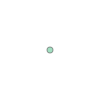

In [3]:
from shapely.geometry import Point

point = Point(41.9295, -88.7499)

point

You can access the following ```Point``` properties using "dot" notation:

1. ```p.x```: x-coordinate value
2. ```p.y```: y-coordinate value
3. ```p.z```: z-coordinate value (i.e., height, elevation, etc., if included)
4. ```p.has_z```: ```bool``` flag if a z-coordinate is available or not

<i>Think about: How might you modify the constructor above to add a z-coordinate?<i>

In [4]:
print(point.x, "x coordinate")
print(point.y, "y coordinate")

if point.has_z:
    print(point.z, "z coordinate")
else:
    print("point has no z coordinate")

41.9295 x coordinate
-88.7499 y coordinate
point has no z coordinate


**Buffer**: a common point-based method.

A ```buffer``` method used with a ```Point``` will create a circle centered on the point that has a given radius ```r```. This turns the ```Point``` into a ```Polygon```.

This can be used to find other points or geometry within a certain distance. For example, if you have an epicenter of an earthquake, you might want to know how many houses are within x miles. For a hail report, you might want to know if any car dealerships are within x meters of the report.

Here is a simple example of a ```buffer``` that creates a circle of radius 5 around the point we defined above:

<i>Think about: when you are defining a radius distance, what is the first unit of measurement that comes to mind? Foot? Meter? Degree? The buffer will always be in the **same** unit as the coordinates. So, if you have a latitude/longitude degree coordinate, and want a buffer of 10 kilometers, providing an ```r``` of 10 will give you a very unexpected result. We will talk about how to avoid this later in this chapter.</i>

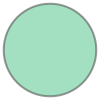

In [5]:
buffer = point.buffer(distance=5)

buffer

Compare the printed ```point``` and printed ```buffer``` attributes below. What do you notice?

The original variable ```point``` has a spatial data type of ```Point```. After applying the ```buffer``` method to ```point```, the new variable now has a type of ```Polygon```. Since you set the result equal to a different variable, the original point data is not modified.

<i>Think about: Why would such a simple shape (circle) have so many coordinates in the ```Shapely``` data model?</i>

In [6]:
print(point)

print(buffer)

POINT (41.9295 -88.7499)
POLYGON ((46.9295 -88.7499, 46.90542363336098 -89.2399857016478, 46.83342640201615 -89.72535161008064, 46.71420167866104 -90.2013233862723, 46.54889766255643 -90.66331716182545, 46.339106321741774 -91.10688368412998, 46.086848061512725 -91.52775116509801, 45.79455226681368 -91.92186642081822, 45.465033905932735 -92.28543390593273, 45.10146642081823 -92.61495226681369, 44.70735116509801 -92.90724806151272, 44.28648368412998 -93.15950632174177, 43.84291716182545 -93.36929766255643, 43.38092338627231 -93.53460167866105, 42.90495161008064 -93.65382640201615, 42.419585701647804 -93.72582363336097, 41.9295 -93.7499, 41.4394142983522 -93.72582363336099, 40.95404838991936 -93.65382640201615, 40.47807661372769 -93.53460167866105, 40.01608283817455 -93.36929766255643, 39.57251631587001 -93.15950632174177, 39.15164883490199 -92.90724806151272, 38.75753357918177 -92.61495226681369, 38.39396609406726 -92.28543390593273, 38.06444773318631 -91.92186642081822, 37.7721519384872

### Chapter 7.1.2 - LineString

A line string requires at least two geographic points to define the starting vertex and the ending vertex (i.e., the vertices of the ```LineString```). The data type automatically creates an ```edge``` (line) between the points. ```LineString``` expects a list of points, so make sure you are passing in the correct Python data type. Typically, coordinates are written as ```tuples``` and can be stored in a ```list```.

For example, we might want to describe the starting and ending points of a Tornado using a ```LineString```.

Let's say it started in DeKalb, IL (41.9295° N, 88.7499° W) and ended in St. Charles, IL (41.9142° N, 88.3087° W). Modify the example below to create that track:

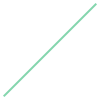

In [7]:
from shapely.geometry import LineString

vertices = [(1, 2), (3, 4)]

line = LineString(vertices)

line

Let's say the tornado was 1000 meters wide. Run a ```buffer``` method on the line to show the true width of the tornado:

**LineString methods**

LineStrings have some useful methods that can help when running an analysis or displaying data.

1. ```length```: find the length of the line (in the geographic units provided)
2. ```xy```: get the vertices in list form (makes it easier to plot on a map)

Print the length of the line you created above. Does it seem reasonable?

<i>Think about: what is the equation to calculate the distance between two points? You can use this to validate your output and detect any errors or assumption violations.</i>

<i>In the weeds: Measuring distance becomes more complicated with latitude/longitude and even projected coordinates when the two points are far away from one another. For latitude/longitude, you have to use [great circle distance](https://en.wikipedia.org/wiki/Great-circle_distance) to accurately calculate the distance. This rotates the sphere (i.e., Earth's representation) so that the two points are on the "equator" of the sphere (https://en.wikipedia.org/wiki/Geographical_distance). For relatively small distances, especially within projected coordinates, it is reasonable to treat the coordinates as [Cartesian coordinates](https://en.wikipedia.org/wiki/Cartesian_coordinate_system), as long as there is not a need for extremely accurate measurements. For this course, we are most interested in understanding and using projections correctly. An advanced GIS course may cover the other topics in detail.</i>

In [8]:
print(line.length)

2.8284271247461903


### Chapter 7.1.3 - Polygon

[Respect the polygon!](https://www.youtube.com/watch?v=nGjgQqk79x0)

A ```Polygon``` is created in a similar way to ```LineString```, except it requires at least 3 points (why 3?). A ```Polygon``` represents the boundaries of a geographic area. This can be very simple (3 vertices) or extremely complex.

<i>In the weeds: [The Coastline Paradox](https://en.wikipedia.org/wiki/Coastline_paradox). This is the unintuitive finding that the "actual" distance of a coastline (or other geographic feature) can only be approximated. To increase the detail of the Polygon (see below), you have to increase the number of vertices to better approximate the "real" boundaries. However, coastline features become [increasingly fractal](https://en.wikipedia.org/wiki/Fractal_dimension) at smaller scales, resulting in an exponential increase in vertex count and complexity (and processing times!). As you may have noticed, even something as simple as measuring distance or the length of a coastline requires assumptions and/or compromises. In this case, you have to pick a spatial scale that is "good enough" for your application.</i>

![cparadox](https://upload.wikimedia.org/wikipedia/commons/f/f9/Britain-fractal-coastline-50km.png)

Create a tornado warning polygon that includes DeKalb, IL by modifying the ```Polygon``` definition below.

Note: Shapely will close your Polygon if you do not include the first coordinate as the last coordinate.

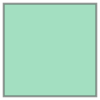

In [9]:
from shapely.geometry import Polygon

# will automatically add (1, 2) to close the polygon
vertices = [(1, 2), (1, 4), (3, 4), (3, 2)]

poly = Polygon(vertices)

poly

**Polygon Methods**

1. ```area```: the area of the polygon in the given coordinates
2. ```length```: the perimeter of the polygon
3. ```contains```: does the polygon contain a given geometry object?

Print out the area and perimeter of your polygon below. Does this make sense?

<i>Think about: What are the equations for area and perimeter? You can use these to validate the results and find bugs or assumption violations.</i>

In [10]:
print(poly.area, "area")
print(poly.length, "perimeter")

4.0 area
8.0 perimeter


### Chapter 7.1.4 - General Geometry Methods

```Shapely``` (and by extension, ```geopandas```) provides multiple types of methods that can manipulate, measure, and analyze geometric objects. The general types of processes include:

1. [Affine transformations](https://en.wikipedia.org/wiki/Affine_transformation): Methods that can translate (move), rotate (modify the orientation), and/or scale (change size) geometric objects. The full list of methods can be found in the [Shapely Documentation - Affine](https://shapely.readthedocs.io/en/2.1.1/manual.html#affine-transformations).

2. [Spatial Relationships](https://en.wikipedia.org/wiki/Spatial_relation): Methods that test the existence of certain relationships for a geometry or between geometry. For example, is one object inside the other object? Do the two objects intersect in space? The full list of methods can be found in the [Shapely Documentation - Spatial Relationships](https://shapely.readthedocs.io/en/2.1.1/manual.html#predicates-and-relationships).

3. [Measurements](https://shapely.readthedocs.io/en/2.1.1/measurement.html): geometry-aware measurements of object length, area, perimeter, etc.

4. [Constructive](https://shapely.readthedocs.io/en/2.1.1/constructive.html): geometry-aware manipulations that create a new polygon from the original polygon. Examples include buffer, bounding box, geometry simplifications, etc.

5. [Overlay](https://en.wikipedia.org/wiki/Vector_overlay): Widely-used methods (sometimes called ```set operations```) that overlay multiple geometric objects to create a new object with geometric features derived from the original objects. Examples include union, intersect, etc. The full list of methods can be found in the [Shapely Documentation - Set Operations](https://shapely.readthedocs.io/en/2.1.1/set_operations.html)

**Affine Transformations**

First, define a polygon (make it a rectangle so the transforms are easier to see):

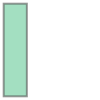

In [11]:
from shapely.geometry import Polygon

vertices = [(1, 2), (1, 10), (3, 10), (3, 2)]

poly = Polygon(vertices)

poly

import the ```affinity``` module from Shapely.

This module has several methods, including

1. ```rotate```: modify the orientation of the geometry by a given degree
2. ```scale```: modify the size of the geometry in the x and/or y dimensions by a given factor
3. ```translate```: move the geometry in the x and/or y dimension by a given distance (hard to see here, so we will not demonstrate yet)

Modify the code below to rotate the polygon by 90 degrees in any direction.

<i>Note: In this coordinate system, counter-clockwise rotation occurs with a positive angle, and clockwise rotation with a negative angle.</i>

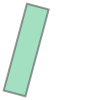

In [12]:
from shapely import affinity

scaled = affinity.rotate(poly, angle=-15, origin='centroid')

scaled

Modify the code below to scale the geometry by 10 in the x dimension and 0.5 in the y dimension. Does the result meet your expectations?

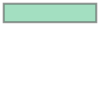

In [13]:
from shapely import affinity

scaled = affinity.scale(poly, xfact=10, yfact=0.5)

scaled

**Overlay transformations**

Assuming two polygons ```a``` and ```b```:

1. ```intersection```: new polygon only where ```a``` and ```b``` overlap
2. ```union```: new polygon combining regions contained by ```a``` and ```b```.
3. ```difference```: assuming a.difference(b), only areas in a that are not contained by b

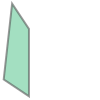

In [14]:
from shapely.geometry import Polygon

vertices1 = [(1, 2), (1, 10), (3, 10), (3, 2)]

vertices2 = [(0, 2), (1, 11), (3, 8), (3, 0)]

poly1 = Polygon(vertices1)
poly2 = Polygon(vertices2)

poly2

Create an ```intersection``` of poly1 and poly2 based on the documentation here: https://shapely.readthedocs.io/en/stable/reference/shapely.intersection.html

Create a ```union``` of poly1 and poly2 based on the documentation here: https://shapely.readthedocs.io/en/2.1.1/reference/shapely.union.html#shapely.union

Create a ```difference``` of poly1 and poly2 based on the documentation here: https://shapely.readthedocs.io/en/stable/reference/shapely.difference.html